In [1]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

data = pd.read_csv('/content/drive/MyDrive/DM/Classification/ObesityDataSet.csv')



Mounted at /content/drive/


In [3]:
# Step 3: Preprocessing the Data
# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [19]:
# Encode the target variable
target_encoder = LabelEncoder()
data['NObeyesdad'] = target_encoder.fit_transform(data['NObeyesdad'])

In [20]:
# Separate features (X) and target (y)
X = data.drop('NObeyesdad', axis=1)  # Drop the target column
y = data['NObeyesdad']  # Target variable

In [21]:

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [22]:

# Step 5: Initialize and Train the Random Forest Classifier
# Random Forest with 100 estimators (trees) and maximum depth of 10
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of each tree
    random_state=42,       # Ensures reproducibility
    n_jobs=-1,             # Use all processors for faster training
    class_weight="balanced" # Handle imbalanced classes if present
)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [23]:

# Step 6: Evaluate the Model
# Predictions
y_pred = rf_classifier.predict(X_test)

In [16]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.56%


In [25]:
# Convert target classes to string labels for classification report
target_names = [str(class_label) for class_label in target_encoder.classes_]

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.82      0.93      0.87        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.91      0.86      0.88        58
           6       0.95      0.95      0.95        58

    accuracy                           0.95       423
   macro avg       0.95      0.94      0.94       423
weighted avg       0.95      0.95      0.95       423



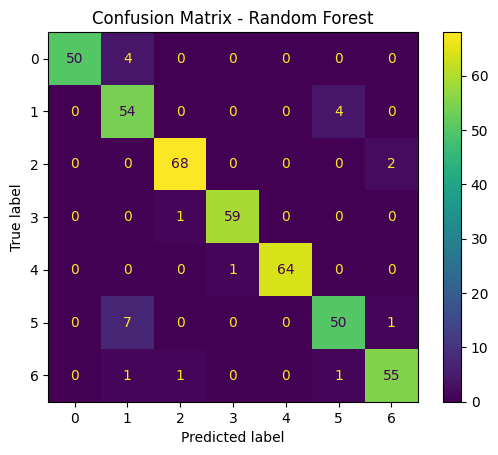

In [26]:
# Step 7: Visualize the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    rf_classifier, X_test, y_test, display_labels=target_encoder.classes_
)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [27]:

# Step 8: Feature Importance Visualization
# Extract feature importance from the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

<ipython-input-28-55bf1ab61738>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


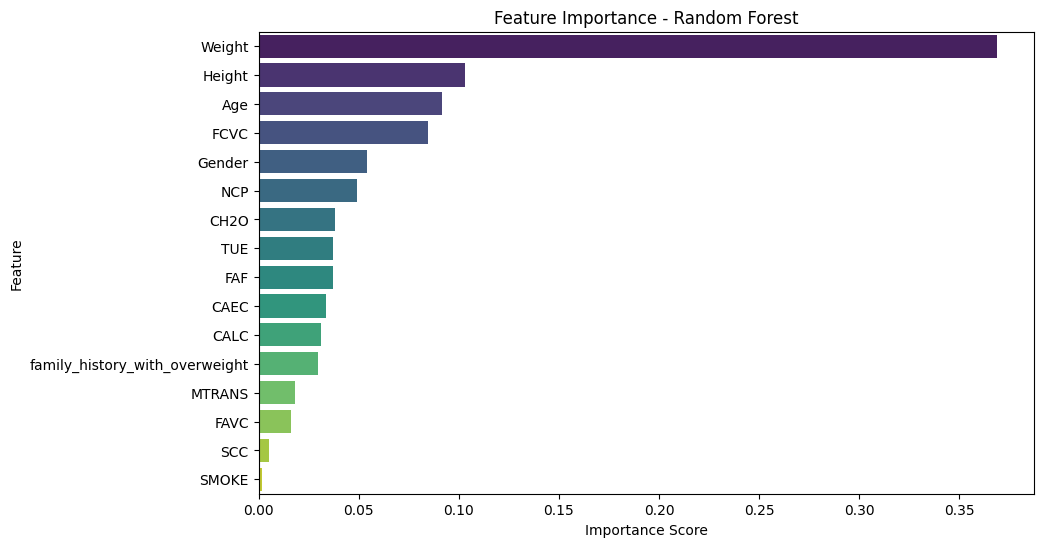

Model saved as 'random_forest_model.joblib'


In [28]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Optional: Save the model for later use
import joblib
joblib.dump(rf_classifier, 'random_forest_model.joblib')
print("Model saved as 'random_forest_model.joblib'")